In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
%matplotlib inline
register_matplotlib_converters()

In [54]:
filename = '../data/demo_2020_0505.sqlite'

def get_hourly_kwh(filename):
    dfs = {}
    for id in (1,2,3,4,5,18,19):
        cname = 'GenKWH-{}'.format(id)
        print(cname)
        with sqlite3.connect(filename) as con:
            sql = '''SELECT 
                         strftime("%H", LoggedDatetime) AS hour,  
                         (MAX(KWH) - MIN(KWH)) AS GenKWH
                     FROM 
                         inverter_minutely 
                     WHERE
                         DeviceID == (?)
                     GROUP BY hour;'''
            invdf  = pd.read_sql(sql, con=con, params=(id,))
            invdf = invdf.rename(columns={'GenKWH': 'GenKWH-{}'.format(id)})
            invdf = invdf.set_index('hour')
        dfs[id] = invdf
    dfs = pd.concat(dfs.values(), axis=1)
    return dfs


dfs = get_hourly_kwh(filename)
print(dfs)



GenKWH-1
GenKWH-2
GenKWH-3
GenKWH-4
GenKWH-5
GenKWH-18
GenKWH-19
      GenKWH-1  GenKWH-2  GenKWH-3  GenKWH-4  GenKWH-5  GenKWH-18  GenKWH-19
hour                                                                        
05         0.0       1.0       1.0       1.0       0.0        0.0        0.0
06        12.0      11.0      13.0      13.0      13.0        6.0        2.0
07        27.0      22.0      26.0      27.0      28.0       12.0        7.0
08        35.0      32.0      35.0      35.0      36.0       16.0       11.0
09        37.0      36.0      38.0      37.0      38.0       17.0       10.0
10        42.0      40.0      42.0      40.0      41.0       20.0       10.0
11        43.0      42.0      42.0      41.0      42.0       19.0       10.0
12        39.0      40.0      39.0      38.0      39.0       14.0        9.0
13        36.0      37.0      35.0      33.0      34.0       15.0        9.0
14        27.0      29.0      27.0      25.0      26.0       14.0       10.0
15        1

<AxesSubplot:xlabel='hour'>

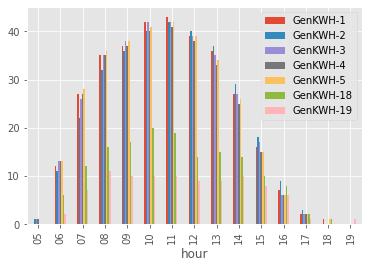

In [55]:



matplotlib.style.use("ggplot")
dfs.plot.bar()